In [1]:
# Import the libraries we need for this lab

import torch.nn as nn
import torch

import matplotlib.pyplot as plt
torch.manual_seed(2)

In [2]:
# Create a tensor

z = torch.arange(-10, 10, 0.1,).view(-1, 1)

In [3]:
# Create a sigmoid object

sig = nn.Sigmoid()

In [4]:
# Make a prediction of sigmoid function

yhat = sig(z)

Text(0, 0.5, 'yhat')

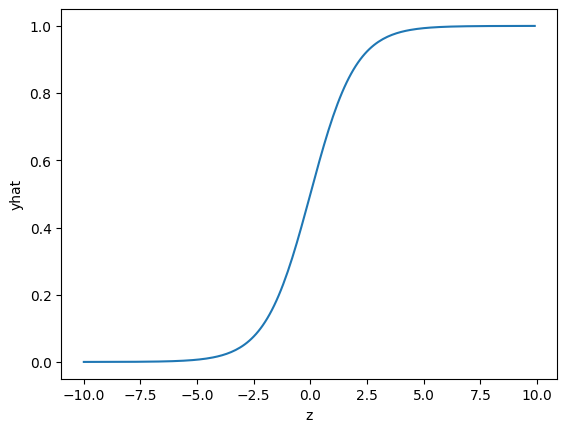

In [5]:
# Plot the result

plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

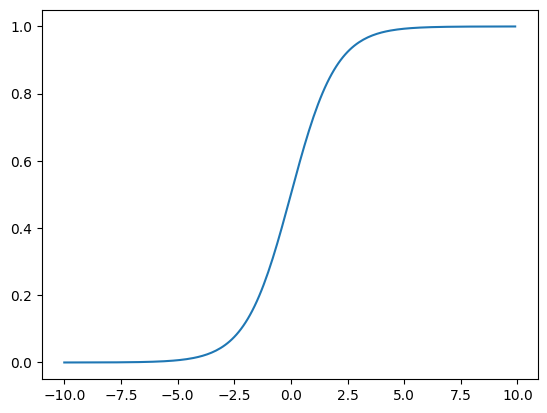

In [6]:
# Use the build in function to predict the result

yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

plt.show()

In [7]:
# Create a tanh object

TANH = nn.Tanh()

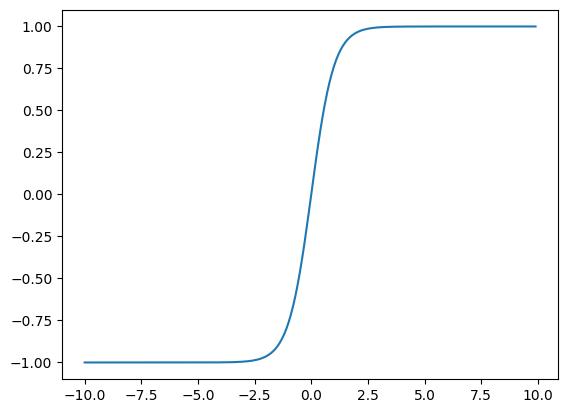

In [8]:
# Make the prediction using tanh object

yhat = TANH(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

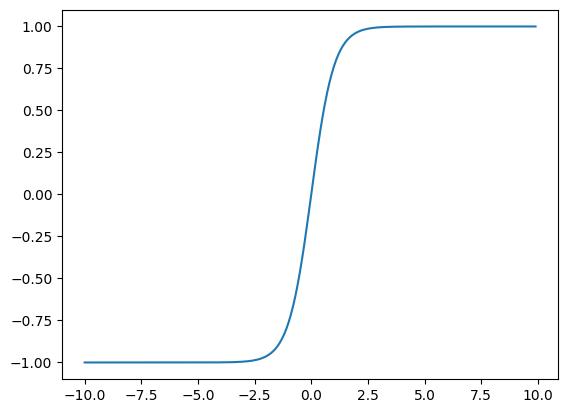

In [9]:
# Make the prediction using the build-in tanh object

yhat = torch.tanh(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

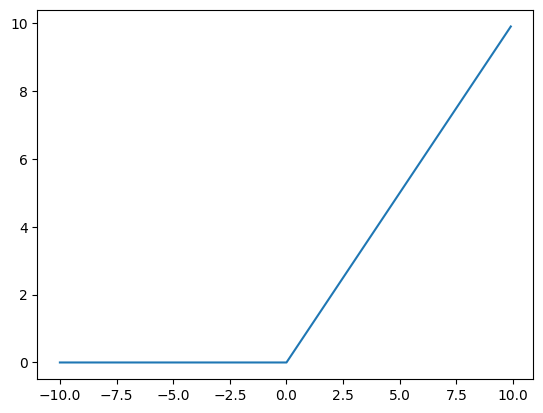

In [10]:
# Create a relu object and make the prediction

RELU = nn.ReLU()
yhat = RELU(z)
plt.plot(z.numpy(), yhat.numpy())

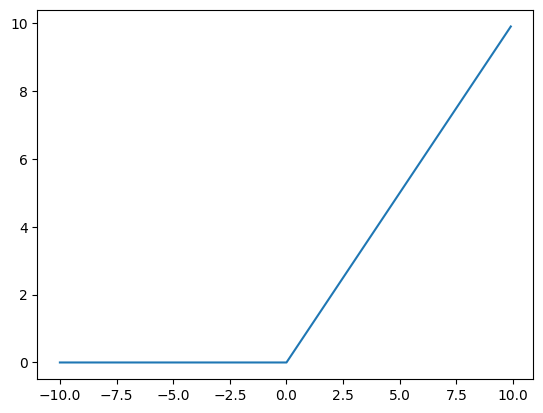

In [11]:
# Use the build-in function to make the prediction

yhat = torch.relu(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

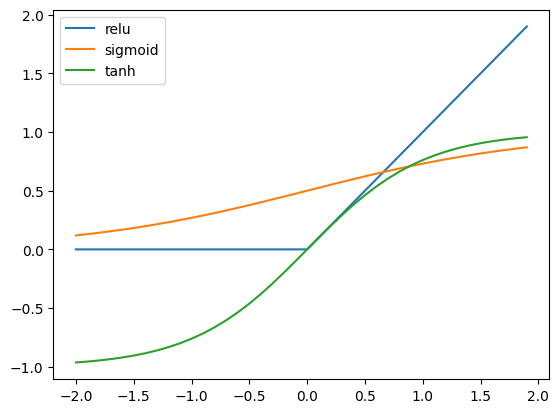

In [12]:
# Plot the results to compare the activation functions

x = torch.arange(-2, 2, 0.1).view(-1, 1)
plt.plot(x.numpy(), torch.relu(x).numpy(), label='relu')
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label='sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='tanh')
plt.legend()

In [13]:
# Uncomment the following line to install the torchvision library
# !mamba install -y torchvision

# Import the libraries we need for this lab

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

In [14]:
# Build the model with sigmoid function

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [15]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [16]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [17]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [18]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.48MB/s]


In [19]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [20]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [21]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [22]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [23]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [24]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [25]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [26]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

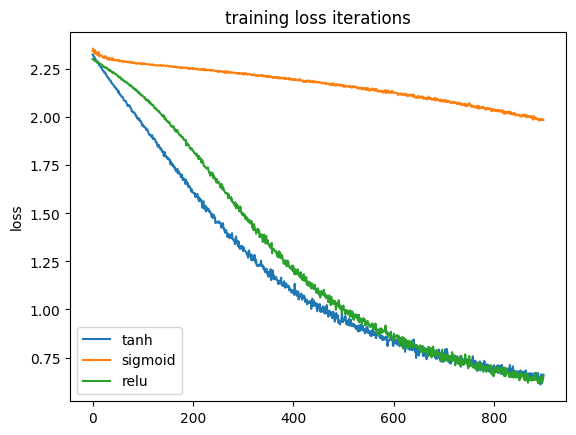

In [27]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

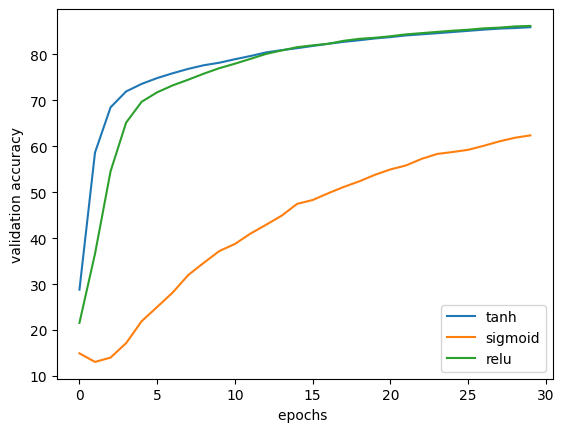

In [28]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()